# Ice Velocity Plot 
This script plots the sampled ITS LIVE 6-day and 12-day pairs (2018-2023) data previously outputted to a CSV.

In [1]:
# IMPORT MODULES [velocity_download environment]
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [2]:
# OPEN THE ITS_LIVE 6-DAY PAIRS CSV FILE 
ITS_LIVE_data = pd.read_csv(r'R:/JAKOBSHAVN/DATA/ice_surface_velocity/ITS_LIVE_6_DAY/its_live_sampled_6_12_day.csv')

# DEFINE THE VELOCITY VARIABLE FOR EACH POINT
POINT1_VELOCITY = ITS_LIVE_data['POINT_1_VELOCITY']
POINT2_VELOCITY = ITS_LIVE_data['POINT_2_VELOCITY']
POINT3_VELOCITY = ITS_LIVE_data['POINT_3_VELOCITY']
POINT4_VELOCITY = ITS_LIVE_data['POINT_4_VELOCITY']
POINT5_VELOCITY = ITS_LIVE_data['POINT_5_VELOCITY']
POINT6_VELOCITY = ITS_LIVE_data['POINT_6_VELOCITY']
POINT7_VELOCITY = ITS_LIVE_data['POINT_7_VELOCITY']

# DEFINE THE MID-DATE VARIABLE
ITS_LIVE_data['mid_date'] = pd.to_datetime(ITS_LIVE_data['mid_date'], format='%Y/%m/%d')

# INPUT DESIRED X AXIS, Y AXIS, AND PLOT TITLES
xtitle = 'Date'
ytitle = 'Ice Velocity (km/yr)'
title = 'Jakobshavn Isbræ Ice Velocity (2018-2023)'

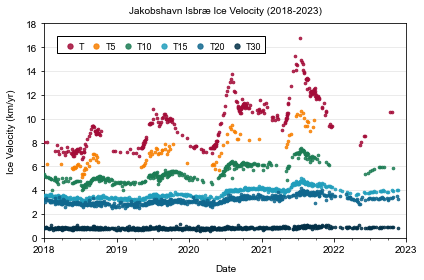

In [11]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(6, 4))
plt.title(title, pad=10, fontsize=10)
#plt.grid(axis = 'x', alpha=0.3, zorder=0)
plt.grid(axis = 'y', alpha=0.3, zorder=0)
plt.ylabel(ytitle, labelpad=10, fontsize=10)
plt.xlabel(xtitle, labelpad=10)

# PLOT A SCATTER PLOT FOR EACH POINT
plt.scatter(ITS_LIVE_data['mid_date'], POINT1_VELOCITY/1000, color='#a30b37', s=7, marker='o', alpha=0.85, label='T', zorder=20)
plt.scatter(ITS_LIVE_data['mid_date'], POINT2_VELOCITY/1000, color='#f77f00', s=7, marker='o', alpha=0.85, label='T5', zorder=20)
plt.scatter(ITS_LIVE_data['mid_date'], POINT3_VELOCITY/1000, color='#1c7c54', s=7, marker='o', alpha=0.85, label='T10', zorder=20)
plt.scatter(ITS_LIVE_data['mid_date'], POINT4_VELOCITY/1000, color='#219ebc', s=7, marker='o', alpha=0.85, label='T15', zorder=20)
plt.scatter(ITS_LIVE_data['mid_date'], POINT5_VELOCITY/1000, color='#10678e', s=7, marker='o', alpha=0.85, label='T20', zorder=20)
plt.scatter(ITS_LIVE_data['mid_date'], POINT7_VELOCITY/1000, color='#023047', s=7, marker='o', alpha=0.85, label='T30', zorder=20)

# SET THE X AXIS TICK LIMITS
plt.ylim(0, 18)
plt.yticks(np.arange(0, 18+1, 2))

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

# ADD A LEGEND WITH THREE COLUMNS, HORIZONTAL ARRANGEMENT, AND WHITE BACKGROUND
legend = plt.legend(loc='upper left', ncol=6, columnspacing=0.3, markerscale=2, frameon=True, framealpha=1, handletextpad=0.01, handleheight=0.1, fontsize = 9, facecolor='white', borderaxespad = 1.4, borderpad=0.45, fancybox=False)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
legend.set_zorder(20)
for text in legend.get_texts():
    text.set_va('center')

plt.tight_layout()